In [14]:
import pandas as pd

temperature_df = pd.read_excel('dataset/Temp_SRS_1Jan1964_to_31Oct2020.xlsx')
rainfall_df = pd.read_csv('dataset/Rainfall_at_SRS_30Nov1960_to_18Nov2020.csv')

rainfall_df = rainfall_df.fillna(0)

temperature_df['DATE'] = pd.to_datetime(temperature_df['DATE'], format='%Y-%m-%d')
rainfall_df['DATE'] = pd.to_datetime(rainfall_df['DATE'], format='%m/%d/%Y')

rain_temp_df = pd.merge(temperature_df, rainfall_df, on='DATE')

print(rain_temp_df.head(10))

        DATE  LOW TEMP  HIGH TEMP  200-F Rainfall (inches/day)
0 1964-01-01        30         36                         0.01
1 1964-01-02        25         50                         0.00
2 1964-01-03        32         64                         0.00
3 1964-01-04        43         59                         0.00
4 1964-01-05        39         61                         0.00
5 1964-01-06        50         65                         0.10
6 1964-01-07        53         66                         0.20
7 1964-01-08        42         53                         2.01
8 1964-01-09        42         56                         0.60
9 1964-01-10        29         42                         0.00


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:10:40
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Help on function plot_model in module pycaret.regression.functional:

plot_model(estimator, plot: str = 'residuals', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    
    Example
    --------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'residual')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'residual'
        List of available p

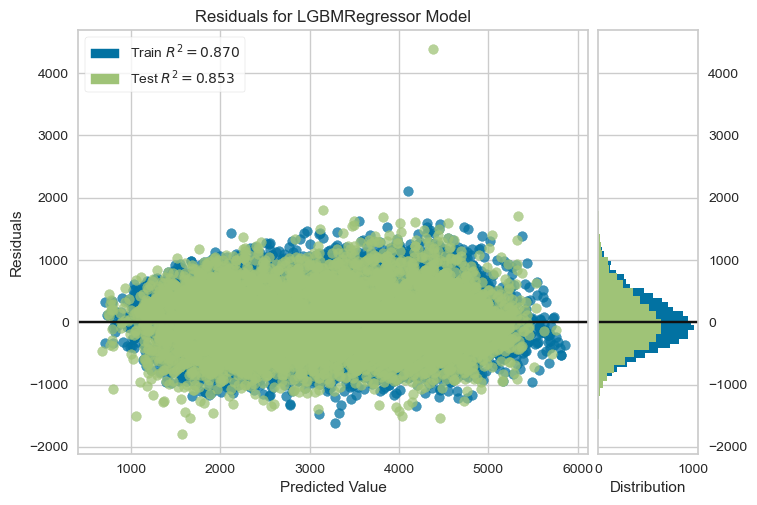

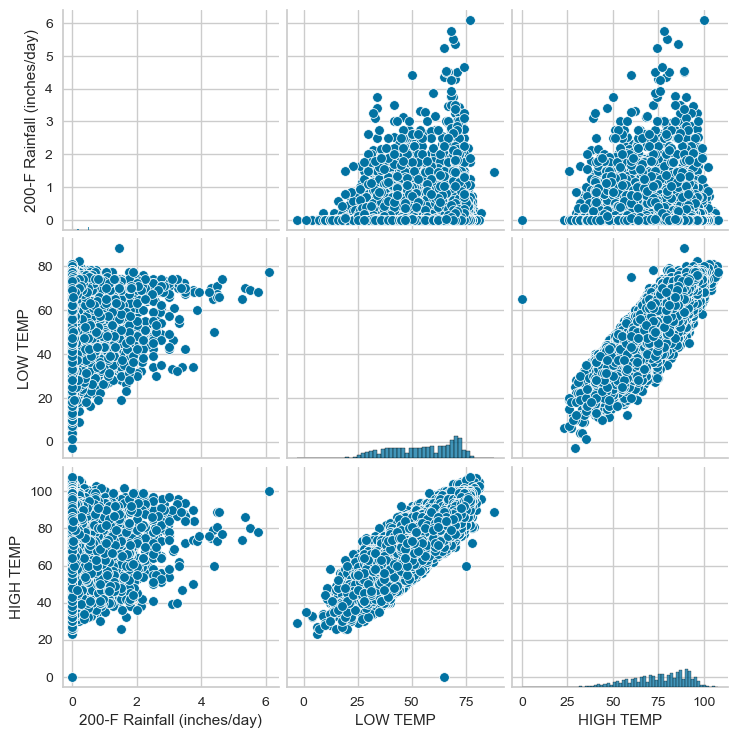

In [15]:
from pycaret.regression import *

regression_setup = setup(rain_temp_df, target='HIGH TEMP', normalize=True, transform_target=True)
best = compare_models()
help(plot_model)
plot_model(best, plot='residuals')

import seaborn as sns
variables = ['200-F Rainfall (inches/day)', 'LOW TEMP', 'HIGH TEMP']
selected_data = rain_temp_df[variables]
sns.pairplot(selected_data)
